## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

Ans:
結果如下:
NESTEROV = 1, Momentum= 0.950000
 11s 214us/step - loss: 0.8720 - acc: 0.6911 - val_loss: 1.4059 - val_acc: 0.5284
測試集 精度最高, Loss最低, 驗証集的精度也是整個測試中較不錯的, 收斂速度最快

NESTEROV = 1, Momentum= 0.500000
11s 214us/step - loss: 1.5561 - acc: 0.4584 - val_loss: 1.5768 - val_acc: 0.4478

NESTEROV = 1, Momentum= 0.100000
11s 216us/step - loss: 1.6564 - acc: 0.4215 - val_loss: 1.6665 - val_acc: 0.4143

NESTEROV = 0, Momentum= 0.950000
10s 193us/step - loss: 0.9622 - acc: 0.6620 - val_loss: 1.3930 - val_acc: 0.5208
測試集 精度次高, Loss次高, 驗証集的精度也是整個測試中較不錯的, 收斂速度也很快,
但比NESTEROV=1的情況稍慢一點

NESTEROV = 0, Momentum= 0.500000
10s 192us/step - loss: 1.5475 - acc: 0.4590 - val_loss: 1.5681 - val_acc: 0.4498
NESTEROVE = 0, Momentum= 0.100000
9s 180us/step - loss: 1.6589 - acc: 0.4227 - val_loss: 1.6703 - val_acc: 0.4163

結論: Momenttum愈高收斂愈快, NESTEROV為1時的效果比為0要好

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.5,0.1]
NESTEROV = [True,False]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for nes in NESTEROV:
    for mom in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with NESTEROVE = %d, Momentum= %.6f" % (nes, mom))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nes, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mon-%s-nes-%s" % (str(mom),str(nes))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


W0720 15:49:08.769971  6380 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0720 15:49:08.771970  6380 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 15:49:08.931980  6380 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 15:49:08.933971  6380 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 15:49:08.937973  6380 

Experiment with NESTEROVE = 1, Momentum= 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0720 15:49:09.257976  6380 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.0375 - acc: 0.2727 - val_loss: 1.8748 - val_acc: 0.3371
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.8133 - acc: 0.3605 - val_loss: 1.7599 - val_acc: 0.3819
Epoch 3/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7268 - acc: 0.3929 - val_loss: 1.7047 - val_acc: 0.3934
Epoch 4/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.6684 - acc: 0.4151 - val_loss: 1.6494 - val_acc: 0.4226
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.6197 - acc: 0.4307 - val_loss: 1.6051 - val_acc: 0.4356
Epoch 6/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5786 - acc: 0.4455 - val_loss: 1.5799 - val_acc: 0.4399
Epoch 7/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.5439 - acc: 0.4582 - val_loss: 1.

50000/50000 [==============================] - 11s 226us/step - loss: 2.2221 - acc: 0.1811 - val_loss: 2.1447 - val_acc: 0.2410
Epoch 2/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.0972 - acc: 0.2628 - val_loss: 2.0551 - val_acc: 0.2730
Epoch 3/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.0224 - acc: 0.2921 - val_loss: 1.9935 - val_acc: 0.3048
Epoch 4/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9701 - acc: 0.3098 - val_loss: 1.9471 - val_acc: 0.3206
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.9313 - acc: 0.3245 - val_loss: 1.9158 - val_acc: 0.3287
Epoch 6/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.9020 - acc: 0.3350 - val_loss: 1.8898 - val_acc: 0.3373
Epoch 7/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.8787 - acc: 0.3436 - val_loss: 1.8676 - val_acc: 0.3450
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.1934 - acc: 0.2069 - val_loss: 2.1652 - val_acc: 0.2176
Epoch 3/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.1320 - acc: 0.2347 - val_loss: 2.1083 - val_acc: 0.2406
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.0807 - acc: 0.2572 - val_loss: 2.0641 - val_acc: 0.2616
Epoch 5/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.0402 - acc: 0.2744 - val_loss: 2.0287 - val_acc: 0.2768
Epoch 6/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.0073 - acc: 0.2906 - val_loss: 2.0005 - val_acc: 0.2889
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.9800 - acc: 0.3032 - val_loss: 1.9738 - val_acc: 0.3010
Epoch 8/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.9566 - acc: 0.3115 - val_loss: 1.9529 - val_acc: 0.3072
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.7368 - acc: 0.3866 - val_loss: 1.7304 - val_acc: 0.3821
Epoch 4/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.6839 - acc: 0.4041 - val_loss: 1.6774 - val_acc: 0.4045
Epoch 5/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.6276 - acc: 0.4258 - val_loss: 1.6208 - val_acc: 0.4261
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.5934 - acc: 0.4386 - val_loss: 1.5976 - val_acc: 0.4368
Epoch 7/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5605 - acc: 0.4510 - val_loss: 1.5481 - val_acc: 0.4568
Epoch 8/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.5279 - acc: 0.4603 - val_loss: 1.5333 - val_acc: 0.4571
Epoch 9/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5122 - acc: 0.4679 - val_loss: 1.5039 - val_acc: 0.4671
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.9801 - acc: 0.3063 - val_loss: 1.9595 - val_acc: 0.3170
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.9384 - acc: 0.3227 - val_loss: 1.9245 - val_acc: 0.3318
Epoch 6/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9057 - acc: 0.3356 - val_loss: 1.8940 - val_acc: 0.3408
Epoch 7/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8785 - acc: 0.3464 - val_loss: 1.8725 - val_acc: 0.3459
Epoch 8/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.8572 - acc: 0.3514 - val_loss: 1.8512 - val_acc: 0.3549
Epoch 9/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.8382 - acc: 0.3604 - val_loss: 1.8334 - val_acc: 0.3554
Epoch 10/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.8222 - acc: 0.3650 - val_loss: 1.8198 - val_acc: 0.3655
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.0154 - acc: 0.2950 - val_loss: 1.9998 - val_acc: 0.2951
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9828 - acc: 0.3054 - val_loss: 1.9716 - val_acc: 0.3011
Epoch 7/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9559 - acc: 0.3116 - val_loss: 1.9462 - val_acc: 0.3110
Epoch 8/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9332 - acc: 0.3197 - val_loss: 1.9263 - val_acc: 0.3168
Epoch 9/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.9140 - acc: 0.3248 - val_loss: 1.9082 - val_acc: 0.3284
Epoch 10/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.8976 - acc: 0.3303 - val_loss: 1.8952 - val_acc: 0.3289
Epoch 11/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.8833 - acc: 0.3359 - val_loss: 1.8815 - val_acc: 0.3380
Epoch 12/50
50000/50000 [

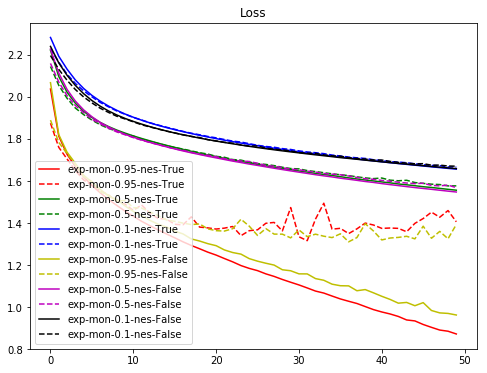

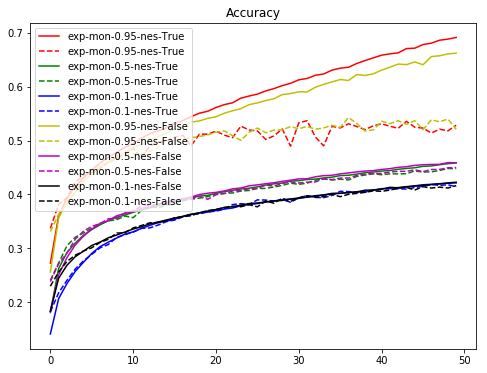

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()